In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
import os

project_root = os.getcwd()
raw_data_dir = os.path.join(project_root, "raw_data")
export_dir = os.path.join(project_root, "export")
print(os.path.exists(export_dir))
print(os.path.exists(raw_data_dir))

True
True


In [3]:
original_data = pd.read_csv(os.path.join(export_dir, "knn_data.csv"))
used_data = pd.read_csv(os.path.join(export_dir, "knn_data.csv"))
results_df = pd.DataFrame()

# Machine Learning model from `knn_data` for Stick-Slip prediction
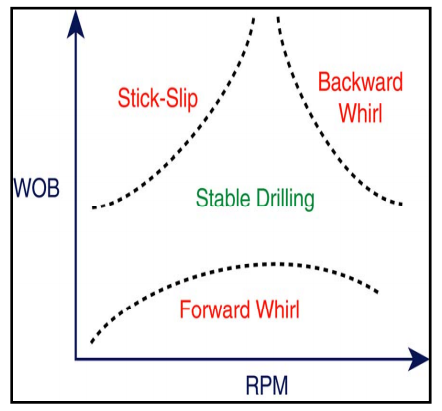

In [4]:
original_data.describe()

,Depth,ROP5,GammaRay,SWOB,TQA,RPM,TRPM_RT,CRPM_RT,STICK_RT,SPPA,TFLO,AnTemp,AnPres,SHKRSK_RT,ECD
count,17718.000000,17718.000000,17718.000000,17718.00000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000,17718.000000
mean,2399.988517,27.620760,82.937179,5.22898,12.348187,145.799101,2921.655588,142.691139,52.568676,180.667826,3271.610063,62.822632,309.340044,0.006626,1.363342
std,779.443808,12.332298,48.506289,3.85748,3.512328,30.394957,302.593675,30.568713,63.696816,34.063269,1021.018141,18.735706,101.860328,0.069826,0.084219
min,1050.036000,0.318000,0.000000,-24.09300,-10.415000,26.167600,0.000000,0.000000,3.000000,28.735000,388.740000,25.000000,127.898000,0.000000,1.214000
25%,1725.053700,18.466500,39.020000,2.58600,10.279350,139.000000,2734.380000,120.400000,12.000000,164.667500,1962.830000,47.000000,219.736000,0.000000,1.301000
50%,2399.919000,26.666700,81.659980,4.32230,11.962850,159.000000,2851.560000,156.800000,24.000000,176.250000,3561.243800,63.000000,311.436300,0.000000,1.331000
75%,3074.936700,38.928750,132.250000,7.18210,14.170000,160.563750,3164.063000,163.000000,69.600000,196.871500,4205.243000,80.000000,417.230000,0.000000,1.470000
max,3749.954400,57.799100,260.898700,54.29120,32.175200,181.000000,4960.940000,232.000000,381.000000,262.284000,4583.442000,95.000000,460.810000,3.000000,1.500000


Graphically, the statistical properties of the `Stick_RT`are shown below, on its boxplot, showing also outliers

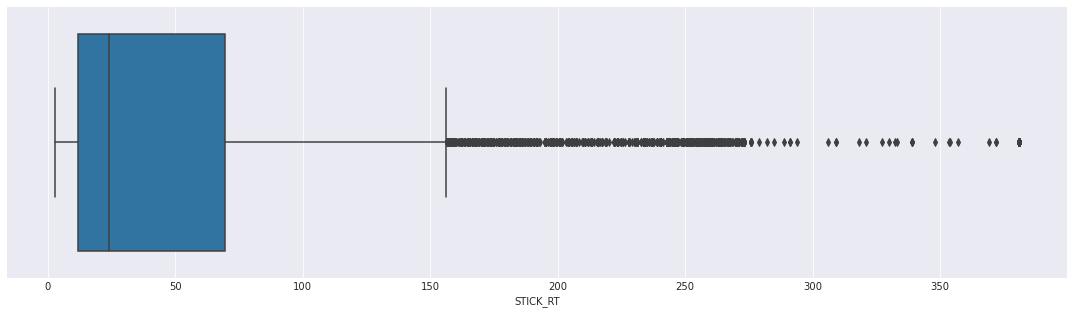

In [5]:
plt.figure(figsize=(19,5))
sns.boxplot(original_data["STICK_RT"])
plt.show()

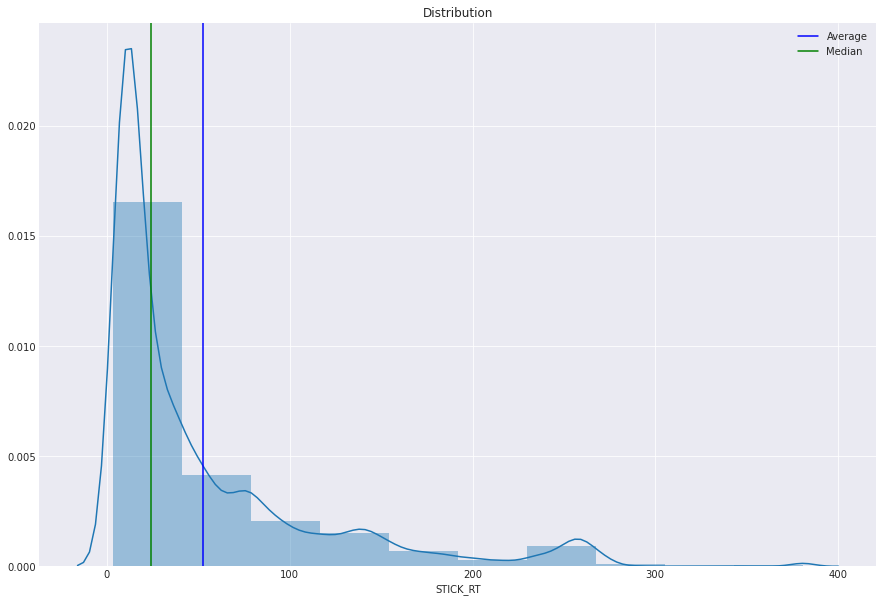

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(original_data['STICK_RT'],bins=10)
plt.axvline(x=52.568676,label="Average",c="b")
plt.axvline(x=24.0,label="Median",c="g")
plt.title("Distribution")
plt.legend()
plt.show()

Corroborated by the `describe`function, the average value [52.568676] and the majority of the values goes from $[0 - 50]$
another important use of the histogram, is to check visually the similarities of values, close looking histogram, will indicate a possible colinearity, which later can be check with a Pearson coefficient heatmap.

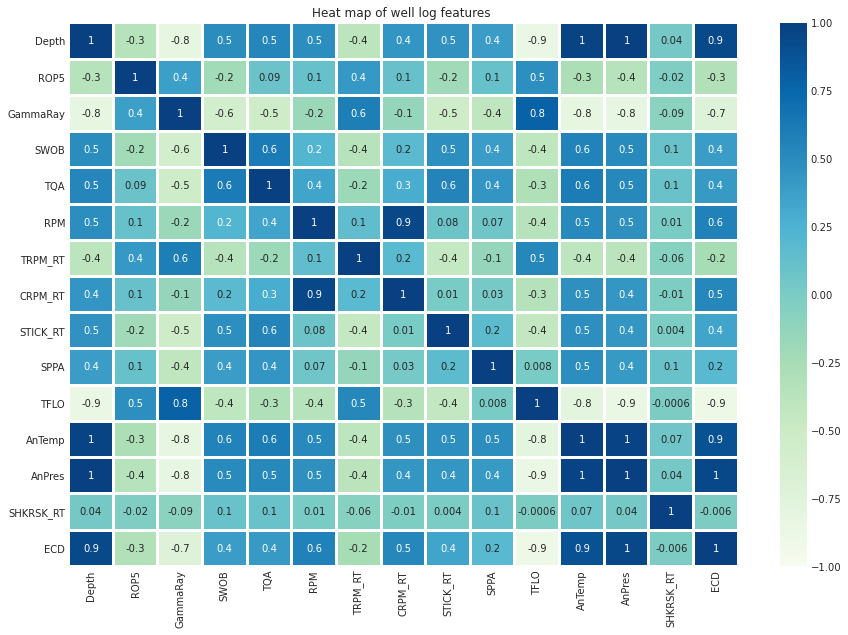

CPU times: user 646 ms, sys: 58.1 ms, total: 704 ms
Wall time: 714 ms


In [7]:
%%time
plt.figure(figsize=(15,10))
sns.heatmap(original_data.corr(), annot=True,fmt = '.1g', cmap= 'GnBu',linewidths=2,vmin=-1, vmax=1, center= 0)
plt.title('Heat map of well log features ')   
plt.show()

Visually, theres no colinearity between the variables and `STICK-SLIP`values

The only feature that has a considerable ammount of Pearson coefficient, nonetheless will remain in the analysis.
- TQA (Surface Torque) = 0.6 

Three methods will be analized
- Multivariate Linear regression
- Regularized Linear Regression:
    - Ridge 
    - Lasso
- XGBoost
- Random Forest 

## Multivariate Regression linear regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
mvr_t = LinearRegression()

### Model construction with Training set
>Train/Test is a method to measure the accuracy of the model [80% Training & 20% Testing]


In [9]:
x_cols = list(original_data.columns.difference(['STICK_RT']))
X = original_data[x_cols]
Y = original_data["STICK_RT"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [10]:
print("Set shapes:\t")
print("\tTraining:\n\t\tX:",X_train.shape,"\n\t\tY:",Y_train.shape)
print("\tTesting:\n\t\tX:",X_test.shape,"\n\t\tY:",Y_test.shape)

Set shapes:	
	Training:
		X: (14174, 14) 
		Y: (14174,)
	Testing:
		X: (3544, 14) 
		Y: (3544,)


In [11]:
mvr_t.fit(X_train, Y_train)

LinearRegression()

In [12]:
print("Features and its coefficients:")
list(zip(x_cols, mvr_t.coef_))

Features and its coefficients:


[('AnPres', -1.211388952903103),
 ('AnTemp', 1.3284246524004526),
 ('CRPM_RT', -0.6599018087419866),
 ('Depth', 0.0961947995902086),
 ('ECD', 215.15455230839814),
 ('GammaRay', -0.25038449058744205),
 ('ROP5', -0.30228238920659534),
 ('RPM', 0.2591659659556524),
 ('SHKRSK_RT', -77.74546101235022),
 ('SPPA', -0.09167766652188707),
 ('SWOB', 2.1112798825672123),
 ('TFLO', -0.01110876941196115),
 ('TQA', 7.2806956333687936),
 ('TRPM_RT', -0.024150421527802807)]

In [13]:
results_df["mvr_t"] = mvr_t.predict(X_test)
results_df["Depth"] = X["Depth"]

In [14]:
print("Coefficient of determination in training set:\n\tR^2 =",round(mvr_t.score(X_test,Y_test)*100,2),"%")

Coefficient of determination in training set:
	R^2 = 53.92 %


In [15]:
used_data["mvr_t"] = mvr_t.predict(X)

In [16]:
print("Coefficient of determination in whole set:\n\tR^2 =",round(mvr_t.score(X,Y)*100,2),"%")

Coefficient of determination in whole set:
	R^2 = 50.81 %


## Ridge Regression
Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients

`L2 Regularization`


In [17]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [18]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2)
x_cols = list(original_data.columns.difference(['STICK_RT']))
X = original_data[x_cols]
Y = original_data["STICK_RT"]

In [19]:
%%time
rr = RidgeCV(alphas=np.arange(0, 1, 0.05), cv=cv, scoring='neg_mean_absolute_error')
rr.fit(X,Y)

CPU times: user 7.73 s, sys: 33.2 ms, total: 7.76 s
Wall time: 3.94 s


RidgeCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=2),
        scoring='neg_mean_absolute_error')

In [20]:
used_data["rr"] = rr.predict(X)

In [21]:
print('alpha (penalized magnitude)= %f' % rr.alpha_)

alpha (penalized magnitude)= 0.250000


In [22]:
print("Coefficient of determination in whole set:\n\tR^2 =",round(rr.score(X,Y)*100,2),"%")

Coefficient of determination in whole set:
	R^2 = 50.84 %


## Lasso Regression
Which penalizes/minimize the sum of absolute values of the coefficients

`L1 Regularization`

In [23]:
from sklearn.linear_model import Lasso
lr = Lasso(max_iter=10000)

In [24]:
x_cols = list(original_data.columns.difference(['STICK_RT']))
X = original_data[x_cols]
Y = original_data["STICK_RT"]

In [25]:
%%time
lr.fit(X,Y)

CPU times: user 623 ms, sys: 20.5 ms, total: 643 ms
Wall time: 325 ms


Lasso(max_iter=10000)

In [26]:
print("Coefficient of determination in whole set:\n\tR^2 =",round(lr.score(X,Y)*100,2),"%")

Coefficient of determination in whole set:
	R^2 = 50.17 %


In [27]:
used_data["lr"] = lr.predict(X)

## Random Forest
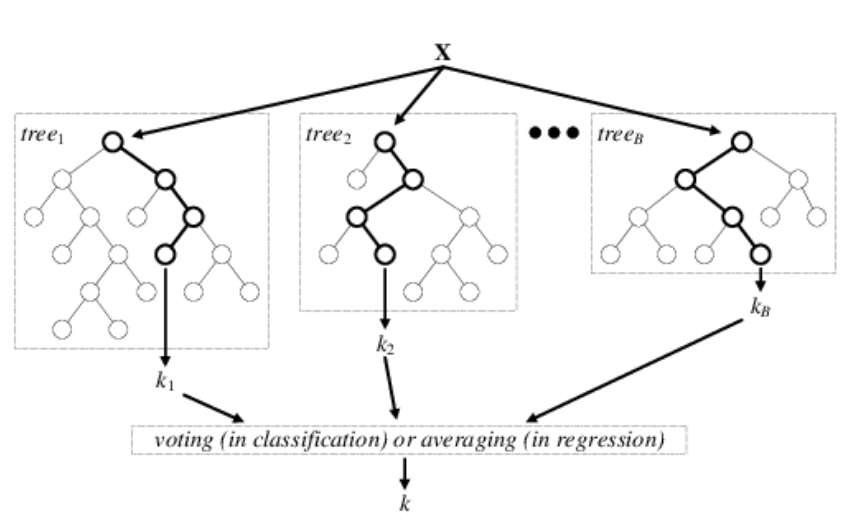

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
x_cols = list(original_data.columns.difference(['STICK_RT']))
X = original_data[x_cols]
Y = original_data["STICK_RT"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [30]:
%%time
rf = RandomForestRegressor(random_state=2).fit(X_train, Y_train)

CPU times: user 11.9 s, sys: 662 ms, total: 12.5 s
Wall time: 12.5 s


In [31]:
print("Coefficient of determination in testing set:\n\tR^2 =",round(rf.score(X_test,Y_test)*100,2),"%")

Coefficient of determination in testing set:
	R^2 = 88.48 %


In [32]:
print("Coefficient of determination in whole set:\n\tR^2 =",round(rf.score(X,Y)*100,2),"%")

Coefficient of determination in whole set:
	R^2 = 96.08 %


In [33]:
used_data["rf"] = rf.predict(X)

## Taking advantage of `Random Forest` Machine Learning Algorithm

In [34]:
hier = list(rf.feature_importances_)

In [35]:
importance_df = pd.DataFrame(list(zip(x_cols, hier)), columns =['Feature', 'Importance']) 
importance_df.sort_values(by=['Importance'],ascending = False)

,Feature,Importance
1,AnTemp,0.324379
3,Depth,0.144855
10,SWOB,0.138557
12,TQA,0.088656
5,GammaRay,0.056998
6,ROP5,0.056495
2,CRPM_RT,0.047484
9,SPPA,0.034531
11,TFLO,0.024705
0,AnPres,0.024353


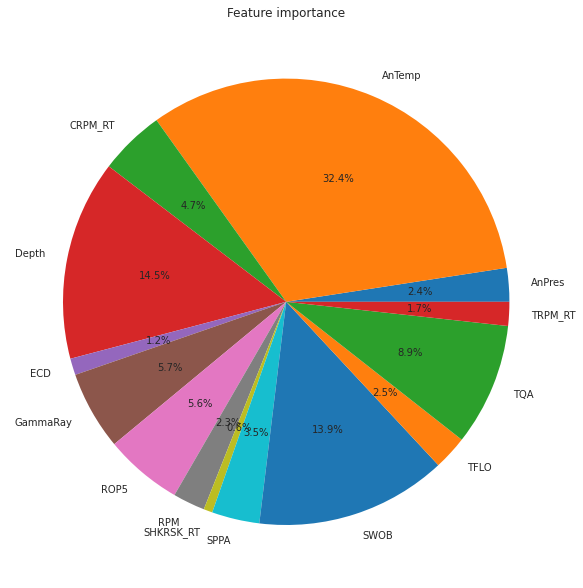

In [36]:
plt.figure(figsize=(10,15))
plt.pie(hier,labels=x_cols,autopct='%1.1f%%')
plt.title("Feature importance")
plt.show()

# Graphing results

In [37]:
ylim_inf = original_data["Depth"].min()
ylim_sup = original_data["Depth"].max()

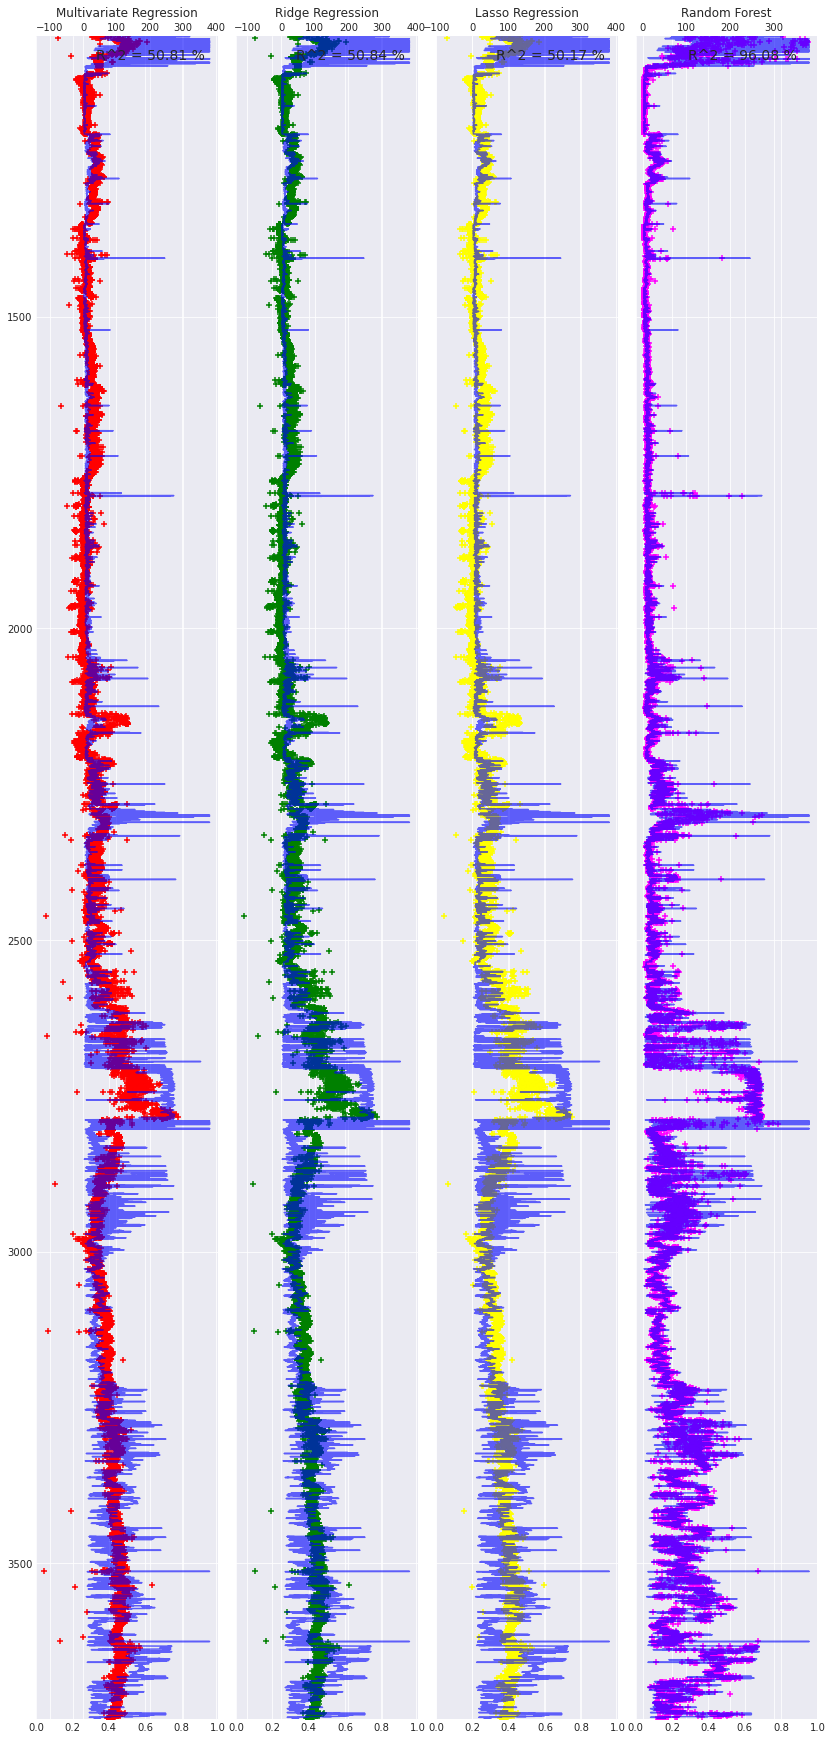

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,17), sharey=True)
fig.subplots_adjust(top=1.5,wspace=0.1)

ax01=ax[0].twiny()
ax01.set_ylim(ylim_sup,ylim_inf)
ax01.plot(original_data['STICK_RT'],original_data["Depth"],color="blue",alpha=.6)
ax01.scatter(used_data['mvr_t'],used_data["Depth"], marker="+",color = "red",label="R^2 = 50.81 %")
ax01.set_title("Multivariate Regression")
ax01.legend(loc="upper right",fontsize=14)

ax02=ax[1].twiny()
ax02.set_ylim(ylim_sup,ylim_inf)
ax02.plot(original_data['STICK_RT'],original_data["Depth"],color="blue",alpha=.6)
ax02.scatter(used_data['rr'],used_data["Depth"], marker="+",color = "green", label="R^2 = 50.84 %")
ax02.set_title("Ridge Regression")
ax02.legend(loc="upper right",fontsize=14)

ax03=ax[2].twiny()
ax03.set_ylim(ylim_sup,ylim_inf)
ax03.plot(original_data['STICK_RT'],original_data["Depth"],color="blue",alpha=.6)
ax03.scatter(used_data['lr'],used_data["Depth"], marker="+",color = "yellow", label="R^2 = 50.17 %")
ax03.set_title("Lasso Regression")
ax03.legend(loc="upper right",fontsize=14)

ax04=ax[3].twiny()
ax04.set_ylim(ylim_sup,ylim_inf)
ax04.plot(original_data['STICK_RT'],original_data["Depth"],color="blue",alpha=.6)
ax04.scatter(used_data['rf'],used_data["Depth"], marker="+",color = "magenta", label="R^2 = 96.08 %")
ax04.set_title("Random Forest")
ax04.legend(loc="upper left",fontsize=14)

plt.show()